##Mobile Price Classification
#Classify mobile price range

https://www.kaggle.com/iabhishekofficial/mobile-price-classification




##Imports

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

##Data

In [249]:
data_train=pd.read_csv(r'/content/train.csv')
data_test=pd.read_csv(r'/content/test.csv')

In [250]:
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [251]:
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


##**Check basic info about the data set including missing value**

In [252]:
data_train.shape,data_test.shape

((2000, 21), (1000, 21))

In [253]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [254]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [255]:
d=data_train.describe()
d

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [256]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [257]:
data_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

##**Exploratory analysis and plots**

Plot a bar diagram to check the number of numeric entrie

From the bar diagram, it shows that there no missing entries.

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

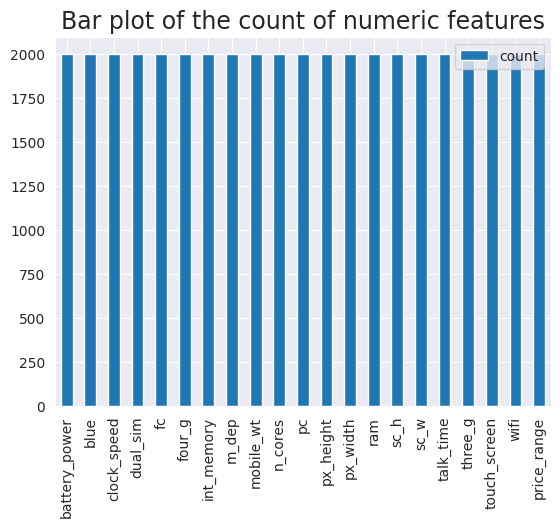

In [258]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

**Distribution of Classes**

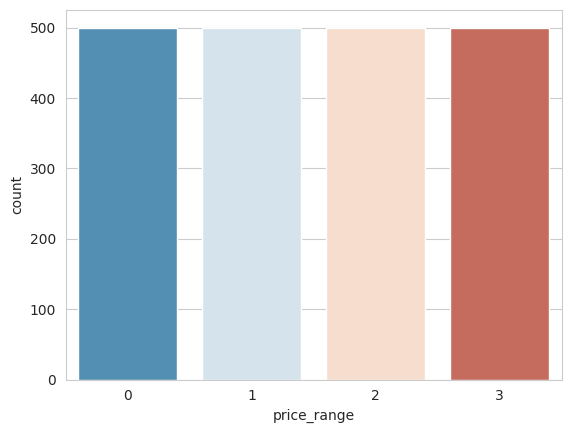

In [259]:
sns.set_style('whitegrid')
sns.countplot(x='price_range',data=data_train,palette='RdBu_r')

**Distribution For each Data**

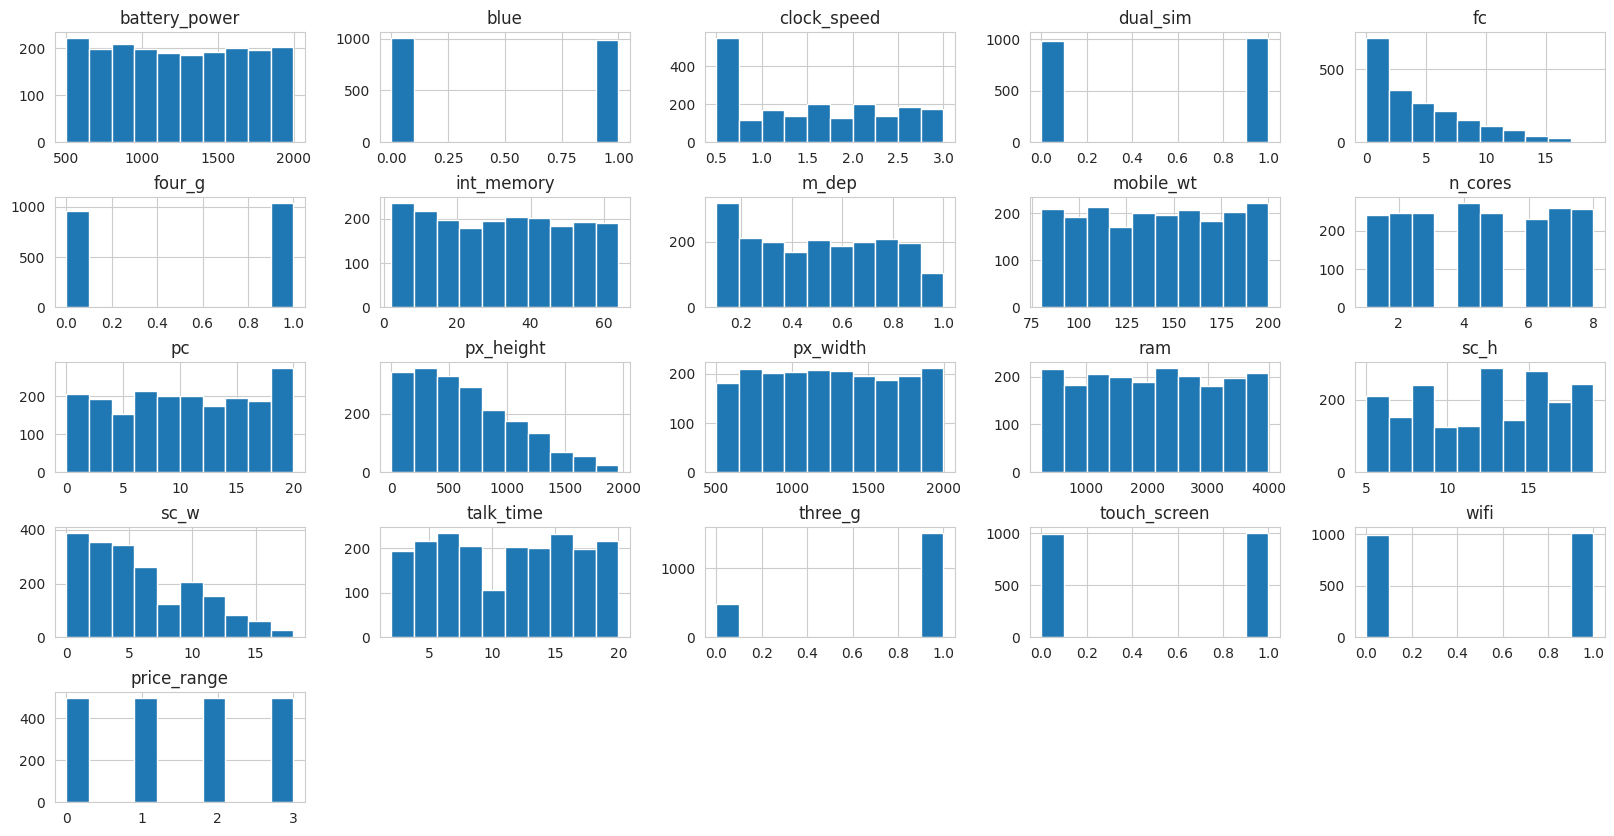

In [260]:
data_train.hist(figsize=(20,10),);
plt.subplots_adjust(hspace=0.5)

**Is there a pattern for the price range based on 3G?**

it looks like in all price ranges most of phones has 3G 


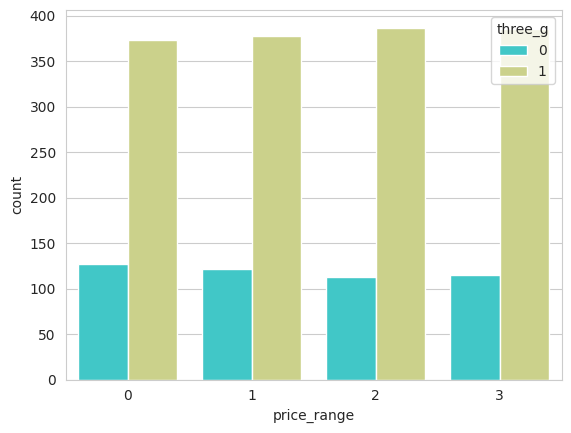

In [261]:
sns.set_style('whitegrid')
sns.countplot(x='price_range',hue='three_g',data=data_train,palette='rainbow')

**What about pattern for the price range based on 4G?**

It looks like in there is equal distribution of both phones with 4G and without 4G in all price ranges.


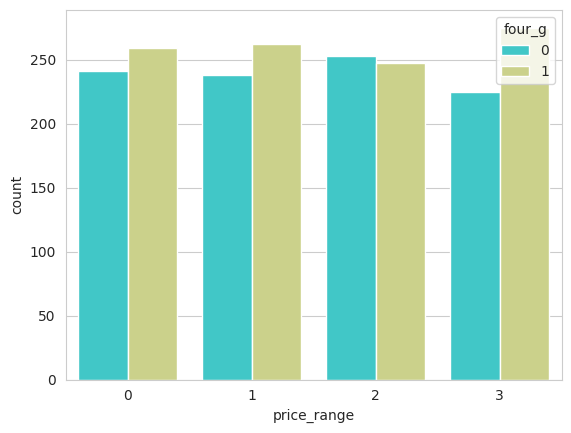

In [262]:
sns.set_style('whitegrid')
sns.countplot(x='price_range',hue='four_g',data=data_train,palette='rainbow')

**What about pattern for the price range based on Touch Screen?**

It looks like 3rd price ranges has most phones wihtout touch screen.and last price range has equal no. of phones with and without touch screen.


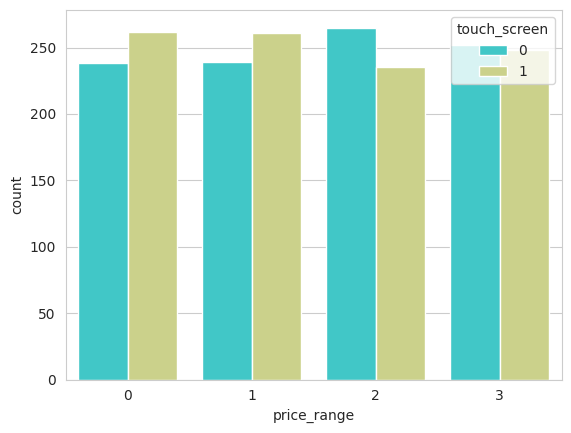

In [263]:
sns.set_style('whitegrid')
sns.countplot(x='price_range',hue='touch_screen',data=data_train,palette='rainbow')

**How does the overall Battery Power distribution look like?**

It looks like that the average Battery Power is almost same for price group 2 and 3 it generally inrecreases from 1st group to 4th group.

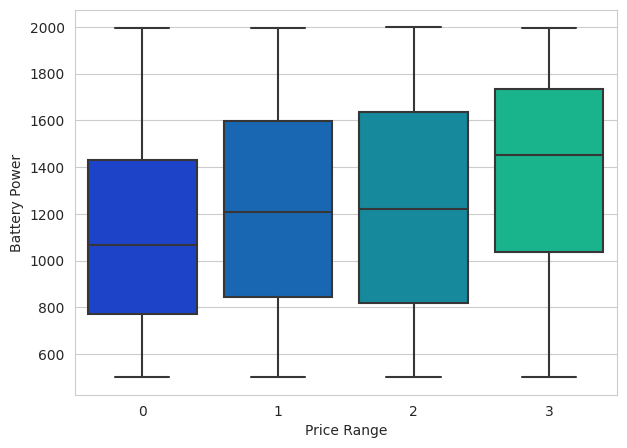

In [264]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='price_range',y='battery_power',data=data_train,palette='winter').set(xlabel='Price Range', ylabel='Battery Power')
plt.show()

**How does the overall Ram distribution look like?**

It looks like that the average Ram is different for all 4 price groups and it generally increcreases from 1st group to 4th group.

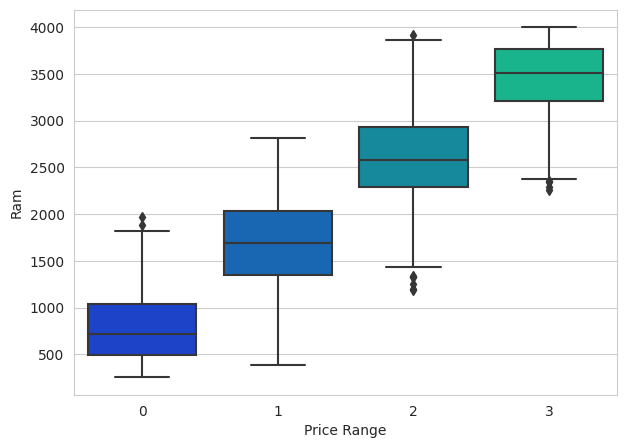

In [265]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='price_range',y='ram',data=data_train,palette='winter').set(xlabel='Price Range', ylabel='Ram')
plt.show()

Text(0.5, 0, 'Price Range')

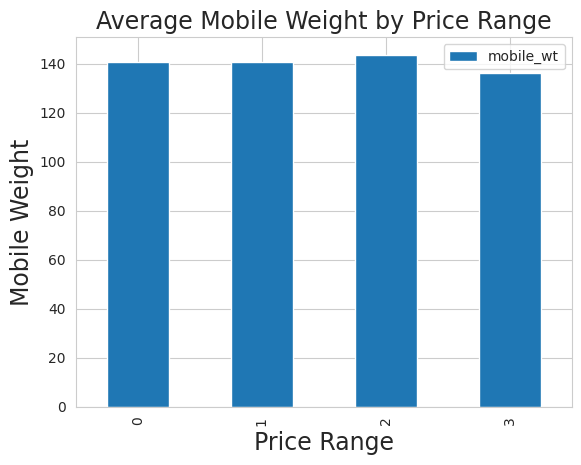

In [266]:
f_price_wt=data_train.groupby('price_range')['mobile_wt'].mean()
f_price_wt = pd.DataFrame(f_price_wt)
f_price_wt.plot.bar(y='mobile_wt')
plt.title("Average Mobile Weight by Price Range",fontsize=17)
plt.ylabel("Mobile Weight", fontsize=17)
plt.xlabel("Price Range", fontsize=17)

**Correlation matrix for the data**

from the plot we can see 3 main features affecting price range are Ram Battery Power and Screen Size

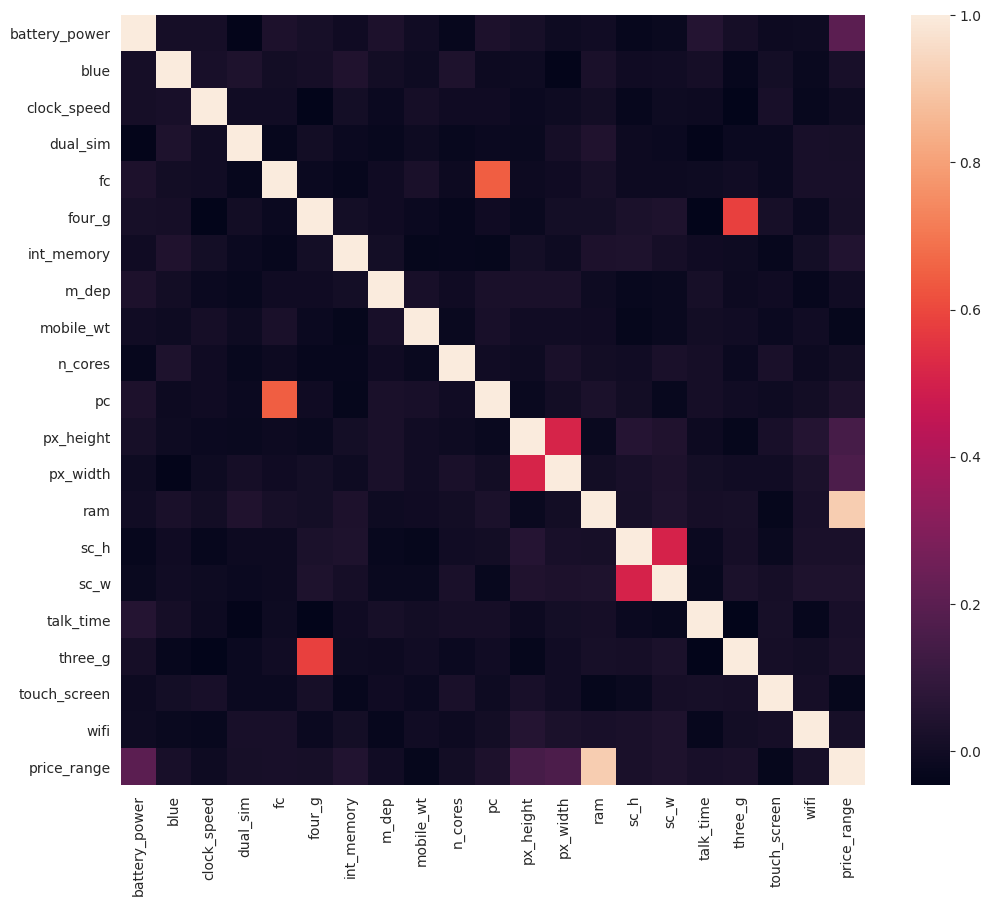

In [267]:
corr = data_train.corr()
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax);

You can see there is positive corrrelation between price range with ram

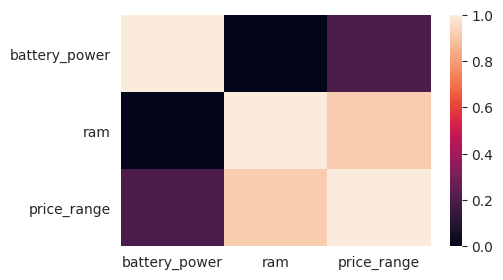

In [268]:
corr = data_train[['battery_power','ram','price_range']].corr()
fig, ax = plt.subplots(figsize=(5,3)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax);

##Spliting data

In [269]:
random_state = 24

In [270]:
X=data_train.drop('price_range',axis=1)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [271]:
Y=data_train['price_range']
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [272]:
std=StandardScaler()

In [273]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state)

#Training The Model

##1) Decision Tree

In [274]:
dt=DecisionTreeClassifier(random_state =random_state )

In [275]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')

In [276]:
Y_pred=dt.predict(X_test)

In [277]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       112
           1       0.72      0.80      0.76       101
           2       0.77      0.80      0.78        98
           3       0.94      0.89      0.91        89

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.84       400
weighted avg       0.84      0.83      0.84       400



In [278]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
dt_ac=round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/cm.sum(),3)
print ("Accuracy of prediction:",dt_ac)

[[95 17  0  0]
 [ 7 81 13  0]
 [ 0 15 78  5]
 [ 0  0 10 79]]
Accuracy of prediction: 0.832


##2) KNN

In [279]:
knn=KNeighborsClassifier()

In [280]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [281]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [282]:
Y_pred=knn.predict(X_test_std)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66       112
           1       0.34      0.40      0.36       101
           2       0.40      0.36      0.38        98
           3       0.72      0.56      0.63        89

    accuracy                           0.51       400
   macro avg       0.52      0.50      0.51       400
weighted avg       0.52      0.51      0.51       400



In [283]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
knn_ac=round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/cm.sum(),3)
print ("Accuracy of prediction:",knn_ac)

[[78 29  5  0]
 [37 40 22  2]
 [10 36 35 17]
 [ 0 14 25 50]]
Accuracy of prediction: 0.507


##3) Logistic Regression

In [284]:
lr=LogisticRegression(random_state =random_state)

In [285]:
lr.fit(X_train_std,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
Y_pred=lr.predict(X_test_std)

In [287]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.94      0.96      0.95       101
           2       0.96      0.92      0.94        98
           3       0.97      0.98      0.97        89

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [288]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
lr_ac=round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/cm.sum(),3)
print ("Accuracy of prediction:",lr_ac)

[[111   1   0   0]
 [  2  97   2   0]
 [  0   5  90   3]
 [  0   0   2  87]]
Accuracy of prediction: 0.962


##4)Train the Support Vector Classifier

In [289]:
svc=SVC(random_state=random_state)

In [290]:
svc.fit(X_train_std,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

In [291]:
Y_pred=svc.predict(X_test_std)

In [292]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       112
           1       0.79      0.93      0.85       101
           2       0.88      0.79      0.83        98
           3       0.93      0.93      0.93        89

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [293]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
svc_acc=round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/cm.sum(),3)
print ("Accuracy of prediction:",svc_acc)

[[102  10   0   0]
 [  2  94   5   0]
 [  0  15  77   6]
 [  0   0   6  83]]
Accuracy of prediction: 0.89


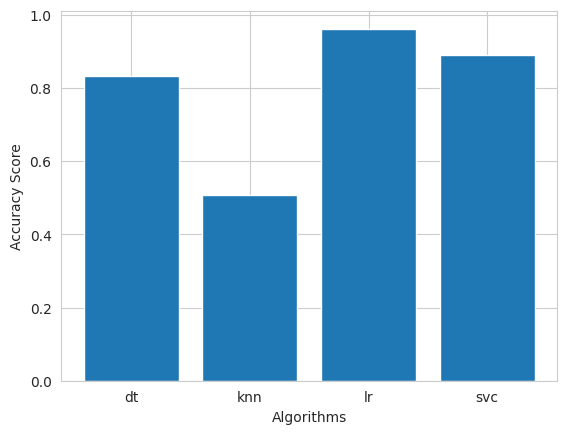

In [294]:
plt.bar(x=['dt','knn','lr','svc'],height=[dt_ac,knn_ac,lr_ac,svc_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

##Hyperparameter Tuning - Grid Search - Cross Validation

We will compare 6 classifier and evaluate mean accuracy of each of them by stratified cross validation.
* Decision Tree Classifier
* SVC
* Random Forest Classifier
* Logistic Regression
* KNN Classifier
* Stochastic Gradient Descent Classifier


In [204]:
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             SGDClassifier(random_state = random_state),]


dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[10,100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                     "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    "penalty": ["l1","l2","none","elasticnet"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [30]}

sgdc_param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid,
                   ]

In [205]:
cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

In [206]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [207]:
for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train_std,Y_train)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(Y_test,clf.predict(X_test_std)))
    
    roc_auc_scores.append(roc_auc_score(Y_test, clf.predict_proba(X_test_std), multi_class='ovr'))
    
    recall_scores.append(recall_score(Y_test, clf.predict(X_test_std), average='weighted'))
    
    precision_scores.append(precision_score(Y_test, clf.predict(X_test_std), average='weighted'))
    
    f1_scores.append(f1_score(Y_test, clf.predict(X_test_std), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")




---------------------------------------------------------------------------
Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2497 out of 2500 | elapsed:   15.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')
Accuracy: %81.19
MSE: 0.1675
ROC AUC: 0.9603122320848001
Recall: 0.8325
Precision: 0.8358221832993104
F1-Score: 0.8332023758878659
Best Estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best'

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  2.5min finished


Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)
Accuracy: %94.81
MSE: 0.0475
ROC AUC: 0.9977634383934514
Recall: 0.9525
Precision: 0.9536191693376577
F1-Score: 0.9524901184986325
Best Estimator: SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)
---------------------------------------------------------------------------
Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  5.7min finished


Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)
Accuracy: %89.31
MSE: 0.1
ROC AUC: 0.985528549974578
Recall: 0.9
Precision: 0.9002705420841104
F1-Score: 0.8998470156696737
Best Estimator: RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 925 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1895 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2726 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3694 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  5.7min finished


Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy: %97.38
MSE: 0.035
ROC AUC: 0.9985285611110057
Recall: 0.965
Precision: 0.965
F1-Score: 0.965
Best Estimator: LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
---------------------------------------------------------------------------
Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy: %64.69
MSE: 0.5
ROC AUC: 0.8442824659957451
Recall: 0.605
Precision: 0.613305443246481
F1-Score: 0.6085895007579277
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')
---------------------------------------------------------------------------
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    5.4s


Model: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=24, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Accuracy: %85.94
MSE: 0.1575
ROC AUC: 0.9654197248157856
Recall: 0.85
Precision: 0.8490714592385439
F1-Score: 0.8475596105632147
Best Estimator: SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=24, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
-------

[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   31.7s finished


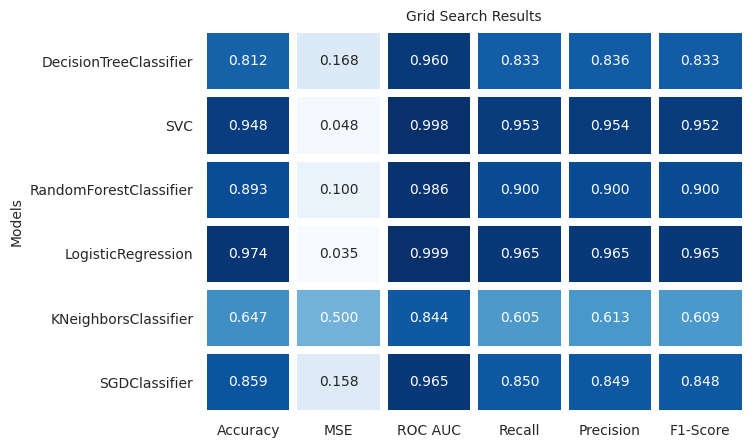

In [215]:
sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "ROC AUC":roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":["DecisionTreeClassifier", 
                                     "SVC",
                                     "RandomForestClassifier",
                                     "LogisticRegression",
                                     "KNeighborsClassifier",
                                     "SGDClassifier",
                                     ]})
cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(7,5))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 10})

plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 10)
plt.show()

##Ensemble Learning



In [295]:
votingC = VotingClassifier(estimators = [("svc",best_estimators[1]),
                                         ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3]),
                                        ])

votingC = votingC.fit(X_train_std, Y_train)

voting_pred = votingC.predict(X_test_std)

In [296]:
print(classification_report(Y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       112
           1       0.92      0.97      0.95       101
           2       0.96      0.92      0.94        98
           3       0.98      0.98      0.98        89

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [297]:
cm=confusion_matrix(Y_test,voting_pred)
print(cm)
vc_acc=round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/cm.sum(),3)
print ("Accuracy of prediction:",vc_acc)

[[110   2   0   0]
 [  1  98   2   0]
 [  0   6  90   2]
 [  0   0   2  87]]
Accuracy of prediction: 0.962


##Best Estimator

In [298]:
classifier =LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classifier.fit(X_train_std,Y_train)

y_pred = classifier.predict(X_test_std)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.94      0.96      0.95       101
           2       0.96      0.92      0.94        98
           3       0.97      0.98      0.97        89

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [299]:
cm=confusion_matrix(Y_test,y_pred)
print(cm)
be_acc=round((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/cm.sum(),3)
print ("Accuracy of prediction:",be_acc)

[[111   1   0   0]
 [  2  97   2   0]
 [  0   5  90   3]
 [  0   0   2  87]]
Accuracy of prediction: 0.962
